In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


[Text(0, 0.5, 'Number')]

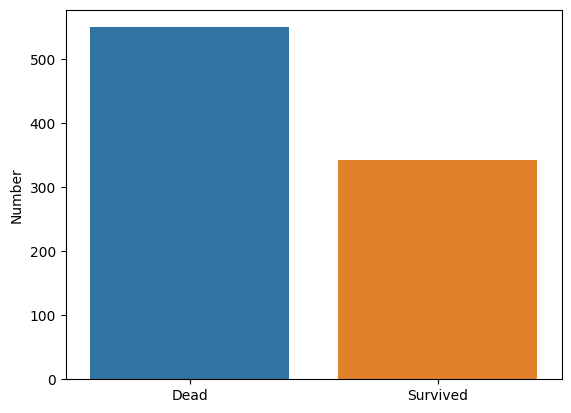

In [22]:
df.Survived.value_counts().rename(index={0: "Dead", 1: "Survived"})
sns.barplot(data=df, x=["Dead", "Survived"], y=df.Survived.value_counts(), linewidth=1).set(ylabel="Number")

In [ ]:
from statistics import mean


average_survivor_age = round(mean(df.dropna().loc[df["Survived"] == 1]["Age"]))
average_death_age = round(mean(df.dropna().loc[df["Survived"] == 0]["Age"]))
print(f"The average age of a person who survived the tragedy is {average_survivor_age}, while the average age of those who perished is {average_death_age}.")

average_survivor_sex = df.loc[df["Survived"] == 1]["Sex"]
average_dead_sex = df.loc[df["Survived"] == 0]["Sex"]

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [78]:
x = df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"]).dropna()
y = x["Survived"]
le = LabelEncoder()
le.fit(x.Sex)
x["Sex"] = le.transform(x.Sex) # {"male": 1, "female": 0}
le.fit(x.Embarked)
x["Embarked"] = le.transform(x.Embarked)

(712,)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x.drop(columns="Survived"), y, test_size=0.3, train_size=0.7, random_state=2023)

In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [88]:
print(f"Accuracy of the logistic regression model is {round(model.score(X_train, y_train), 2)}")

Accuracy of the logistic regression model is 0.8


In [92]:
cross_val_score(model, X_train, y_train)

array([0.74      , 0.81      , 0.79      , 0.73737374, 0.81818182])

Text(113.9222222222222, 0.5, 'True value')

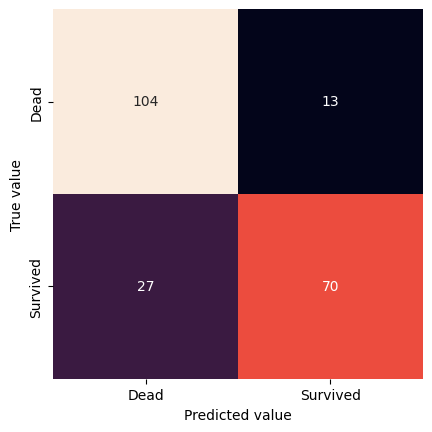

In [119]:
mat = confusion_matrix(y_test, model.predict(X_test)) # {0: "Dead", 1: "Survived"}
sns.heatmap(mat, square=True, annot=True, fmt="g", xticklabels=["Dead", "Survived"], yticklabels=["Dead", "Survived"], cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("True value")

In [121]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, y_train)
acc_random_forest

0.9899598393574297

In [122]:
cross_val_score(random_forest, X_train, y_train)

array([0.8       , 0.82      , 0.8       , 0.78787879, 0.77777778])

Text(113.9222222222222, 0.5, 'True value')

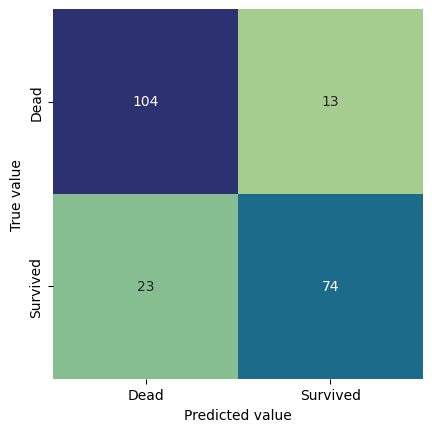

In [123]:
mat_ = confusion_matrix(y_test, Y_pred) # {0: "Dead", 1: "Survived"}
sns.heatmap(mat_, square=True, annot=True, fmt="g", xticklabels=["Dead", "Survived"], yticklabels=["Dead", "Survived"], cbar=False, cmap="crest")
plt.xlabel("Predicted value")
plt.ylabel("True value")